In [1]:
# Sensor/data production terms: ["camera trap", sensor (acoustic, animal-borne), drone, environmental/eDNA, citizen science]

project = "sensors"

import pandas

from observatory import start_project
start_project(project)

Done!


In [2]:
# Get tweets about platforms in nature conservation (Historical focus)
from observatory import search_twitter
trap_twitter = search_twitter(q = 'conservation ("camera trap" OR "camera trapping") has:links', project=project)
sensor_twitter = search_twitter(q = 'conservation (sensor OR sensors) has:links', project=project)
drone_twitter = search_twitter(q = 'conservation (drone OR drones) has:links', project=project)
edna_twitter = search_twitter(q = 'conservation "environmental DNA" has:links', project=project)
cs_twitter = search_twitter(q = 'conservation data "citizen science" has:links', project=project)

{'query': 'conservation ("camera trap" OR "camera trapping") has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!
{'query': 'conservation (sensor OR sensors) has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!
{'query': 'conservation (drone OR drones) has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!
{'query': 'conservation "environmental DNA" has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!
{'query': 'conservation data "citizen science" has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_res

In [3]:
# Get Google results about platforms in nature conservation (Relevance)
from observatory import search_google
trap_google = search_google(q = 'nature conservation camera trap', project = project)
sensor_google = search_google(q = 'nature conservation sensors', project = project)
drone_google = search_google(q = 'nature conservation drones', project = project)
edna_google = search_google(q = 'nature conservation environmental DNA', project = project)
cs_google = search_google(q = 'nature conservation citizen science data', project = project)

Done
Done
Done
Done
Done


In [4]:
# Compile results
from observatory import twitter_process 
twitter = twitter_process(project=project)
from observatory import google_process
google = google_process(datatype = "CSV", project=project)

In [5]:
# Extract organizations from Twitter/Google results
from observatory import get_domains
twitter = get_domains(twitter)
google = get_domains(google)
twitter.groupby(by="domain").count().sort_values(by="link", ascending=False).head(20)
google.groupby(by="domain").count().sort_values(by="link", ascending=False).head(20)

,date,link,metrics,source,query
domain,,,,,
wiley,0,22,0,22,22
nih,0,10,0,10,10
nature,0,10,0,10,10
sciencedirect,0,7,0,7,7
oup,0,6,0,6,6
researchgate,0,5,0,5,5
springer,0,5,0,5,5
wcs,0,5,0,5,5
frontiersin,0,4,0,4,4


In [6]:
# Process all data together 
from observatory import search_merge
pages = search_merge(twitter = twitter, google = google, project = project)
pages

,date,link,metrics,source,query,domain
0,2011-05-02T06:53:26.000Z,http://www.wwfindia.org/?5800/tiger-corridors,0.0,Twitter,"conservation (""camera trap"" OR ""camera trappin...",wwfindia
1,2011-05-17T01:03:04.000Z,http://turfhugger.blogspot.com/2011/05/turfgau...,1.0,Twitter,conservation (sensor OR sensors) has:links,blogspot
2,2011-06-09T19:42:29.000Z,http://www.smartplanet.com/blog/smart-takes/me...,0.0,Twitter,conservation (sensor OR sensors) has:links,smartplanet
3,2011-08-16T08:22:36.000Z,http://www.bbc.co.uk/nature/14535445,1.0,Twitter,"conservation (""camera trap"" OR ""camera trappin...",bbc
4,2011-08-16T10:24:34.000Z,http://rss.cnn.com/~r/rss/cnn_latest/~3/zo1RP-...,0.0,Twitter,conservation (sensor OR sensors) has:links,cnn
...,...,...,...,...,...,...
18012,NaN,https://www.semanticscholar.org/paper/The-ecol...,NaN,Google,nature conservation environmental DNA,semanticscholar
18013,NaN,http://citeseerx.ist.psu.edu/viewdoc/download?...,NaN,Google,nature conservation environmental DNA,psu
18014,NaN,https://theoryandpractice.citizenscienceassoci...,NaN,Google,nature conservation environmental DNA,citizenscienceassociation
18015,NaN,https://biomeme.com/environmental-dna/,NaN,Google,nature conservation environmental DNA,biomeme


In [7]:
# Manage duplication of links here....
## Load previous "all_search_results"
p1 = pandas.read_csv("AI_ML/all_search_results.csv")
p2 = pandas.read_csv("algorithm/all_search_results.csv")
p3 = pandas.read_csv("platform/all_search_results.csv")
p4 = pandas.read_csv("architecture_storage/all_search_results.csv")
previous = pandas.concat([p1, p2, p3, p4], ignore_index=True)
## De-duplicate from this list of pages where there is a match on previous search
pages = pages[~pages["link"].isin(previous["link"])]
pages.reset_index(inplace=True, drop=True)
pages

,date,link,metrics,source,query,domain
0,2011-05-02T06:53:26.000Z,http://www.wwfindia.org/?5800/tiger-corridors,0.0,Twitter,"conservation (""camera trap"" OR ""camera trappin...",wwfindia
1,2011-05-17T01:03:04.000Z,http://turfhugger.blogspot.com/2011/05/turfgau...,1.0,Twitter,conservation (sensor OR sensors) has:links,blogspot
2,2011-06-09T19:42:29.000Z,http://www.smartplanet.com/blog/smart-takes/me...,0.0,Twitter,conservation (sensor OR sensors) has:links,smartplanet
3,2011-08-16T08:22:36.000Z,http://www.bbc.co.uk/nature/14535445,1.0,Twitter,"conservation (""camera trap"" OR ""camera trappin...",bbc
4,2011-08-16T10:24:34.000Z,http://rss.cnn.com/~r/rss/cnn_latest/~3/zo1RP-...,0.0,Twitter,conservation (sensor OR sensors) has:links,cnn
...,...,...,...,...,...,...
17282,NaN,https://www.semanticscholar.org/paper/The-ecol...,NaN,Google,nature conservation environmental DNA,semanticscholar
17283,NaN,http://citeseerx.ist.psu.edu/viewdoc/download?...,NaN,Google,nature conservation environmental DNA,psu
17284,NaN,https://theoryandpractice.citizenscienceassoci...,NaN,Google,nature conservation environmental DNA,citizenscienceassociation
17285,NaN,https://biomeme.com/environmental-dna/,NaN,Google,nature conservation environmental DNA,biomeme


In [8]:
# Get Twitter archives
#pages = pandas.read_csv("algorithm/all_search_results.csv")
from observatory import get_versions
results = get_versions(pages, project = project)
results

/Users/enost/Downloads/observatory_dev_v02.py:694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pages["full_url"] = None # The actual url and not some bit.ly url
/Users/enost/Downloads/observatory_dev_v02.py:695: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pages["url_meta"] = None # Possible additional information
/Users/enost/Downloads/observatory_dev_v02.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,date,link,metrics,source,query,domain,full_url,url_meta,wm_url,wm_meta
0,2011-05-02T06:53:26.000Z,http://www.wwfindia.org/?5800/tiger-corridors,0.0,Twitter,"conservation (""camera trap"" OR ""camera trappin...",wwfindia,https://www.wwfindia.org:443/,None,http://web.archive.org/web/20110421194226id_/h...,Time-of-Tweet Version
1,2011-05-17T01:03:04.000Z,http://turfhugger.blogspot.com/2011/05/turfgau...,1.0,Twitter,conservation (sensor OR sensors) has:links,blogspot,http://turfhugger.blogspot.com/2011/05/turfgau...,None,http://web.archive.org/web/20160211205157id_/h...,No Time-of-Tweet Versions; Got Older Version
2,2011-06-09T19:42:29.000Z,http://www.smartplanet.com/blog/smart-takes/me...,0.0,Twitter,conservation (sensor OR sensors) has:links,smartplanet,https://www.zdnet.com/article/met-museum-deplo...,None,None,No Wayback Version; Got Live URL
3,2011-08-16T08:22:36.000Z,http://www.bbc.co.uk/nature/14535445,1.0,Twitter,"conservation (""camera trap"" OR ""camera trappin...",bbc,https://www.bbc.co.uk/nature/14535445,None,http://web.archive.org/web/20120415052333id_/h...,No Time-of-Tweet Versions; Got Older Version
4,2011-08-16T10:24:34.000Z,http://rss.cnn.com/~r/rss/cnn_latest/~3/zo1RP-...,0.0,Twitter,conservation (sensor OR sensors) has:links,cnn,http://www.cnn.com/2011/WORLD/asiapcf/08/16/ma...,None,http://web.archive.org/web/20120709080215id_/h...,No Time-of-Tweet Versions; Got Older Version
...,...,...,...,...,...,...,...,...,...,...
17282,NaN,https://www.semanticscholar.org/paper/The-ecol...,NaN,Google,nature conservation environmental DNA,semanticscholar,https://www.semanticscholar.org/paper/The-ecol...,None,None,Not historical
17283,NaN,http://citeseerx.ist.psu.edu/viewdoc/download?...,NaN,Google,nature conservation environmental DNA,psu,http://citeseerx.ist.psu.edu/viewdoc/download,None,None,Not historical
17284,NaN,https://theoryandpractice.citizenscienceassoci...,NaN,Google,nature conservation environmental DNA,citizenscienceassociation,https://theoryandpractice.citizenscienceassoci...,None,None,Not historical
17285,NaN,https://biomeme.com/environmental-dna/,NaN,Google,nature conservation environmental DNA,biomeme,https://biomeme.com/environmental-dna/,None,None,Not historical


In [9]:
# Scrape pages
## Initialize / De-duplicate full urls
#results = pandas.read_csv(project+"/page_versions_full.csv")
from observatory import initialize_scrape
urls = initialize_scrape(versions = results, project = project) 

/Users/enost/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/Users/enost/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Done!


/Users/enost/Downloads/observatory_dev_v02.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versions['domain'] = versions.apply(lambda row: domain(row), axis=1)
/Users/enost/Downloads/observatory_dev_v02.py:851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versions['date'] = pandas.to_datetime(versions['date']).dt.strftime('%Y-%U') # Convert to year/week


In [10]:
%cd digcon_scraper/digcon_scraper/
from observatory import scrape
scrape(urls)

/Users/enost/Downloads/digcon_scraper/digcon_scraper


2022-06-30 10:03:48 [py.warnings] WARNING: /Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/extensions/feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)



2022-06-30 10:04:23 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20210117230125id_/http://siouxcityjournal.com/news/world/asia/new-role-for-drones---wildlife-eco-conservation/article_fbae4a6e-c0f7-5883-b46b-aba0011109ad.html> (failed 3 times): 429 Unknown Status


2022-06-30 10:04:29 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://img18.yfrog.com/i/e5rl.jpg/> (failed 3 times): DNS lookup failed: no results for hostname lookup: img18.yfrog.com.
2022-06-30 10:04:29 [scrapy.core.scraper] ERROR: Error downloading <GET http://img18.yfrog.com/i/e5rl.jpg/>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbac

2022-06-30 10:04:33 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://vege.tasteonline.info/uncategorized/the-week-in-wildlife-10.html> (failed 3 times): DNS lookup failed: no results for hostname lookup: vege.tasteonline.info.


2022-06-30 10:04:33 [scrapy.core.scraper] ERROR: Error downloading <GET http://vege.tasteonline.info/uncategorized/the-week-in-wildlife-10.html>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startC

2022-06-30 10:04:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.environment.nsw.gov.au/media/oehmedia12121103.htm> (failed 3 times): 500 Internal Server Error


2022-06-30 10:04:59 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://abxpz> (failed 3 times): DNS lookup failed: no results for hostname lookup: abxpz.
2022-06-30 10:05:00 [scrapy.core.scraper] ERROR: Error downloading <GET http://abxpz>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc

2022-06-30 10:06:35 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://honorama.org/dev/top40/2261> (failed 3 times): 522 Unknown Status


2022-06-30 10:06:48 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.natureworldnews.com/articles/5737/20140122/drone-surveillance-next-step-africas-wildlife-conservation-p> (failed 3 times): 502 Bad Gateway


2022-06-30 10:07:19 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.science.org/doi/abs/10.1126/science.344.6183.459> (failed 3 times): 503 Service Unavailable


2022-06-30 10:07:19 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.science.org/doi/pdf/10.1126/science.344.6183.459> (failed 3 times): 503 Service Unavailable


2022-06-30 10:07:27 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.abudhabicityguide.com/news/news-details.asp> (failed 3 times): 500 Internal Server Error


2022-06-30 10:07:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.abudhabicityguide.com/m/news/news-details.asp> (failed 3 times): 500 Internal Server Error


2022-06-30 10:07:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.science.org/doi/abs/10.1126/science.344.6190.1351-a> (failed 3 times): 503 Service Unavailable


2022-06-30 10:07:39 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.progettowtm.com//magazine/read/expedia-hotel-view_39.html> (failed 3 times): DNS lookup failed: no results for hostname lookup: www.progettowtm.com.
2022-06-30 10:07:39 [scrapy.core.scraper] ERROR: Error downloading <GET http://www.progettowtm.com//magazine/read/expedia-hotel-view_39.html>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/pyth

2022-06-30 10:07:39 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.science.org/doi/full/10.1126/science.344.6183.459> (failed 3 times): 503 Service Unavailable


2022-06-30 10:07:52 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://1drv.ms/1s6m5oi> (failed 3 times): 500 Internal Server Error


2022-06-30 10:08:19 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.science.org/doi/full/10.1126/science.1256014> (failed 3 times): 503 Service Unavailable


2022-06-30 10:08:35 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20141110214209id_/http://www.x20.org/drones-custom-infrared-cameras-stop-rhino-poaching/> (failed 3 times): 429 Unknown Status


2022-06-30 10:09:31 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://earthfix.us/prairie> (failed 3 times): TCP connection timed out: 60: Operation timed out.
2022-06-30 10:09:31 [scrapy.core.scraper] ERROR: Error downloading <GET http://earthfix.us/prairie>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
twisted.internet.error.TCPTimedOutError: TCP connection timed out: 60: Operation timed out.


2022-06-30 10:09:46 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/resolve/doi> (failed 3 times): 503 Service Unavailable


2022-06-30 10:09:58 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://popist.com/s/02f53cc/> (failed 3 times): 500 Internal Server Error


2022-06-30 10:10:24 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://technews.doyoustillhateme.com/amazon-conservation-group-use-drones-to-fight-rain-forest-logging/> (failed 3 times): 500 Internal Server Error


2022-06-30 10:10:41 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.linkedin.com/secure/preRegInvite?=&sharedKey=upMB28k_&invitationID=6046896995044454401&trk=sms-guest-invite-connect&midToken=AQGaD2D2z7qRZQ&fromEmail=fromEmail&ut=1Fu3LExFVOiWk1> (failed 3 times): 502 Bad Gateway


2022-06-30 10:11:41 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20210824063724id_/http://news.nationalgeographic.com/2015/08/150825-data-points-citizen-science/> (failed 3 times): 503 Service Unavailable


2022-06-30 10:11:48 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://nrc-prod.literatumonline.com/toc/juvs/3/3> (failed 3 times): 503 Service Unavailable


2022-06-30 10:11:49 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20220613220832id_/https://esajournals.onlinelibrary.wiley.com/> (failed 3 times): 503 Service Unavailable


2022-06-30 10:11:55 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.uavexpertnews.com/drones-could-reduce-cost-of-forest-conservation> (failed 3 times): 500 Internal Server Error


2022-06-30 10:11:56 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.uavexpertnews.com/drones-could-reduce-cost-of-forest-conservation/> (failed 3 times): 500 Internal Server Error


2022-06-30 10:12:03 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://wpo.st/ij-j0> (failed 3 times): 503 Service Unavailable
2022-06-30 10:12:03 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://wpo.st/of1j0> (failed 3 times): 503 Service Unavailable


2022-06-30 10:12:08 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.uavexpertnews.com/fire-starting-drone-could-improve-conservation/> (failed 3 times): 500 Internal Server Error


2022-06-30 10:12:12 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20220607023253id_/https://www.gofundme.com/discover/other-fundraiser> (failed 3 times): 500 Internal Server Error


2022-06-30 10:12:34 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.uavexpertnews.com/drone-uses-in-conservation-and-agriculture/> (failed 3 times): 500 Internal Server Error


2022-06-30 10:12:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.uavexpertnews.com/using-drones-to-study-high-altitude-glaciers/> (failed 3 times): 500 Internal Server Error


2022-06-30 10:12:54 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://lynk.pw/57q9> (failed 3 times): 522 Unknown Status


2022-06-30 10:13:07 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/cobi.12696/abstract> (failed 3 times): 503 Service Unavailable


2022-06-30 10:13:18 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cell.com/current-biology/fulltext/s0960-9822(16)30318-9> (failed 3 times): 503 Service Unavailable


2022-06-30 10:13:33 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.thefabricator.com/thefabricator/news/shopmanagement/institute-developing-sensors-for-manufacturers-energy-efficiency-to-receive-140-million> (failed 3 times): [<twisted.python.failure.Failure twisted.internet.error.ConnectionLost: Connection to the other side was lost in a non-clean fashion: Connection lost.>]
2022-06-30 10:13:33 [scrapy.core.scraper] ERROR: Error downloading <GET https://www.thefabricator.com/thefabricator/news/shopmanagement/institute-developing-sensors-for-manufacturers-energy-efficiency-to-receive-140-million>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
twisted.web._newclient.ResponseNeverReceived: [<twisted.python.failure.Failure twisted.internet.error.ConnectionLost: Connection to the

2022-06-30 10:13:49 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.environment.sa.gov.au/goodliving/posts/2016/06/deep-creek-drone> (failed 3 times): 500 Internal Server Error


2022-06-30 10:14:01 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://720yun.com/t/53225qa69yv> (failed 3 times): 502 Bad Gateway


2022-06-30 10:14:22 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://wpo.st/nlk92> (failed 3 times): 503 Service Unavailable


2022-06-30 10:14:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://news.nationalgeographic.com/2016/12/drones-fight-pirate-fishing-belize-conservation.html> (failed 3 times): 503 Service Unavailable


2022-06-30 10:14:59 [scrapy.core.downloader.handlers.http11] WARNING: Expected response size (94875070) larger than download warn size (33554432) in request <GET http://web.archive.org/web/20171113065047id_/https://cdn.airvuz.com/drone-video/c69cb089e31a695c6bfa425462af9830/c69cb089e31a695c6bfa425462af9830.mp4>.


2022-06-30 10:15:25 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cell.com/trends/immunology/fulltext/s1471-4906%2817%2930054-6> (failed 3 times): 503 Service Unavailable


2022-06-30 10:15:36 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.sectorpublishingintelligence.co.uk/news/1726319/water+conservation+technologies+in+agriculture+2017+drip+irrigation+desalination+hydroponics+vri+awg+and+sensors+and+smart+meters++research+and+markets> (failed 3 times): 500 Internal Server Error


2022-06-30 10:15:42 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.quora.com/How-viable-do-you-think-would-be-to-use-drones-for-conservation-maintenance-of-historic-buildings/answer/Geoff-Parsons-3> (failed 3 times): 429 Unknown Status


2022-06-30 10:16:20 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.airvuz.com/play> (failed 3 times): 504 Gateway Time-out


2022-06-30 10:16:42 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1002/rse2.62/full> (failed 3 times): 503 Service Unavailable


2022-06-30 10:16:46 [scrapy.core.downloader.handlers.http11] WARNING: Received more bytes than download warn size (33554432) in request <GET http://web.archive.org/web/20171113065047id_/https://cdn.airvuz.com/drone-video/c69cb089e31a695c6bfa425462af9830/c69cb089e31a695c6bfa425462af9830.mp4>.


2022-06-30 10:17:26 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://environment.ec.europa.eu/life/news/newsarchive2018/january/index.htm> (failed 3 times): 503 Service Unavailable
2022-06-30 10:17:26 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://steemit.com/photography/@britcoins/bangpu-recreation-center-and-wetland-conservation> (failed 3 times): 522 Unknown Status


2022-06-30 10:17:44 [scrapy.core.downloader.handlers.http11] WARNING: Expected response size (55069089) larger than download warn size (33554432) in request <GET http://web.archive.org/web/20220121233636id_/http://www.int-res.com/articles/suppl/n035p081_supp/N877Supplement_1.mp4>.


2022-06-30 10:17:45 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/2041-210x.12992/abstract> (failed 3 times): 503 Service Unavailable


2022-06-30 10:17:58 [scrapy.core.downloader.handlers.http11] WARNING: Expected response size (94875070) larger than download warn size (33554432) in request <GET http://web.archive.org/web/20171113065047id_/https://cdn.airvuz.com/drone-video/c69cb089e31a695c6bfa425462af9830/c69cb089e31a695c6bfa425462af9830.mp4>.


2022-06-30 10:17:59 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1002/aqc.2890> (failed 3 times): 503 Service Unavailable


2022-06-30 10:17:59 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://news.nationalgeographic.com/2018/04/thermal-infrared-cameras-drones-poaching-conservation-animals-spd.html> (failed 3 times): 503 Service Unavailable


2022-06-30 10:18:00 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.dub.io/tw/39993886> (failed 3 times): 500 Internal Server Error


2022-06-30 10:18:06 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/1365-2664.13148> (failed 3 times): 503 Service Unavailable


2022-06-30 10:18:10 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1111/mam.12046> (failed 3 times): 503 Service Unavailable


2022-06-30 10:18:18 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/toc/20563485/4/1> (failed 3 times): 503 Service Unavailable


2022-06-30 10:18:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.droneascent.com/5191-2/> (failed 3 times): 503 Service Unavailable


2022-06-30 10:19:07 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/abs/10.1002/rse2.58> (failed 3 times): 503 Service Unavailable


2022-06-30 10:19:20 [scrapy.core.downloader.handlers.http11] WARNING: Received more bytes than download warn size (33554432) in request <GET http://web.archive.org/web/20171113065047id_/https://cdn.airvuz.com/drone-video/c69cb089e31a695c6bfa425462af9830/c69cb089e31a695c6bfa425462af9830.mp4>.
2022-06-30 10:19:20 [scrapy.core.downloader.handlers.http11] WARNING: Received more bytes than download warn size (33554432) in request <GET http://web.archive.org/web/20220121233636id_/http://www.int-res.com/articles/suppl/n035p081_supp/N877Supplement_1.mp4>.


2022-06-30 10:19:23 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1111/cobi.12706> (failed 3 times): 503 Service Unavailable


2022-06-30 10:19:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.droneascent.com/more-advances-in-drone-for-conservation/> (failed 3 times): 503 Service Unavailable


2022-06-30 10:19:30 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.pnas.org/doi/10.1073/pnas.1811906115> (failed 3 times): 503 Service Unavailable


2022-06-30 10:19:59 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://esajournals.onlinelibrary.wiley.com/doi/abs/10.1002/fee.1281> (failed 3 times): 503 Service Unavailable


2022-06-30 10:20:06 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://newsd.in/dark-side-of-the-viral-bear-cub-video/> (failed 3 times): 503 Service Unavailable


2022-06-30 10:20:09 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.droneascent.com/aerial-footage-of-bears-sparks-> (failed 3 times): 503 Service Unavailable


2022-06-30 10:20:18 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1111/aje.12568> (failed 3 times): 503 Service Unavailable


2022-06-30 10:20:20 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.droneascent.com/aerial-footage-of-bears-sparks-debate-of-drones-and-conservation/> (failed 3 times): 503 Service Unavailable


2022-06-30 10:20:23 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1111/aje.12550> (failed 3 times): 503 Service Unavailable


2022-06-30 10:20:36 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.droneascent.com/drones-aid-in-conservation-of-elusive-nightjar-bird/> (failed 3 times): 503 Service Unavailable


2022-06-30 10:20:53 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cambridge.org/core/journals/bird-conservation-international/article/cameratrapping-successfully-and-noninvasively-reveals-the-presence-activity-and-habitat-choice-of-the-critically-endangered-whitewinged-flufftail-sarothrura-ayresi-in-a-south-african-highaltitude-wetland/78d78eef40a9f5a6ab3345ea2381959e> (failed 3 times): 500 Internal Server Error


2022-06-30 10:20:58 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://pb.fyi/4sqc> (failed 3 times): 503 Service Unavailable


2022-06-30 10:21:00 [scrapy.core.downloader.handlers.http11] WARNING: Expected response size (94875070) larger than download warn size (33554432) in request <GET http://web.archive.org/web/20171113065047id_/https://cdn.airvuz.com/drone-video/c69cb089e31a695c6bfa425462af9830/c69cb089e31a695c6bfa425462af9830.mp4>.


2022-06-30 10:21:08 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1002/aqc.3058> (failed 3 times): 503 Service Unavailable


2022-06-30 10:21:08 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/pdf/10.1002/aqc.3058> (failed 3 times): 503 Service Unavailable


2022-06-30 10:21:23 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.quora.com/Would-drones-be-effective-against-poachers/answer/Fabian-Petersen-2> (failed 3 times): 429 Unknown Status


2022-06-30 10:21:31 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://bublup.co/2ltq30ogwbu> (failed 3 times): 503 Service Unavailable


2022-06-30 10:21:36 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.reuters.com/video/watch/drones-revolutionize-orangutan-conservat-id538544819> (failed 3 times): 503 Service Unavailable


2022-06-30 10:21:37 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.reuters.com/video/watch/idpfm4> (failed 3 times): 503 Service Unavailable


2022-06-30 10:21:45 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.qiosk.com/> (failed 3 times): TCP connection timed out: 60: Operation timed out.
2022-06-30 10:21:45 [scrapy.core.scraper] ERROR: Error downloading <GET http://www.qiosk.com/>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
twisted.internet.error.TCPTimedOutError: TCP connection timed out: 60: Operation timed out.


2022-06-30 10:21:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://nrc-prod.literatumonline.com/doi/abs/10.1139/juvs-2018-0035> (failed 3 times): 503 Service Unavailable


2022-06-30 10:21:52 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1002/aqc.3089> (failed 3 times): 503 Service Unavailable


2022-06-30 10:22:00 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/epdf/10.1111/csp2.54> (failed 3 times): 503 Service Unavailable


2022-06-30 10:22:15 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/csp2.86> (failed 3 times): 503 Service Unavailable


2022-06-30 10:22:18 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1002/aqc.3189> (failed 3 times): 503 Service Unavailable


2022-06-30 10:22:22 [scrapy.core.downloader.handlers.http11] WARNING: Received more bytes than download warn size (33554432) in request <GET http://web.archive.org/web/20171113065047id_/https://cdn.airvuz.com/drone-video/c69cb089e31a695c6bfa425462af9830/c69cb089e31a695c6bfa425462af9830.mp4>.
2022-06-30 10:22:22 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1002/aqc.3163> (failed 3 times): 503 Service Unavailable
2022-06-30 10:22:22 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1002/aqc.3163> (failed 3 times): 503 Service Unavailable


2022-06-30 10:22:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1002/aqc.3208> (failed 3 times): 503 Service Unavailable


2022-06-30 10:22:39 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/10.1111/csp2.86> (failed 3 times): 503 Service Unavailable


2022-06-30 10:22:40 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/full/10.1111/csp2.86> (failed 3 times): 503 Service Unavailable


2022-06-30 10:22:41 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.uavexpertnews.com/2019/09/using-drones-to-help-save-an-endangered-river/> (failed 3 times): 500 Internal Server Error


2022-06-30 10:22:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://nrc-prod.literatumonline.com/doi/10.1139/juvs-2019-0013> (failed 3 times): 503 Service Unavailable


2022-06-30 10:22:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://insights.globalspec.com/article/12698/small-soil-moisture-sensor-has-big-impact-on-water-conservation> (failed 3 times): 503 Service Unavailable


2022-06-30 10:22:52 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cambridge.org/core/journals/bird-conservation-international/article/evaluation-of-disturbance-effect-on-geese-caused-by-an-approaching-unmanned-aerial-vehicle/4a17f4a9b1cae94572b3bad285d9dcc8> (failed 3 times): 500 Internal Server Error


2022-06-30 10:23:01 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.linkedin.com/leap/r> (failed 3 times): 502 Bad Gateway


2022-06-30 10:23:18 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://nrc-prod.literatumonline.com/doi/abs/10.1139/juvs-2019-0013> (failed 3 times): 503 Service Unavailable


2022-06-30 10:23:49 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/ddi.13029> (failed 3 times): 503 Service Unavailable


2022-06-30 10:23:59 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20171113065047id_/https://cdn.airvuz.com/drone-video/c69cb089e31a695c6bfa425462af9830/c69cb089e31a695c6bfa425462af9830.mp4> (failed 3 times): User timeout caused connection failure: Getting http://web.archive.org/web/20171113065047id_/https://cdn.airvuz.com/drone-video/c69cb089e31a695c6bfa425462af9830/c69cb089e31a695c6bfa425462af9830.mp4 took longer than 180.0 seconds..
2022-06-30 10:23:59 [scrapy.core.scraper] ERROR: Error downloading <GET http://web.archive.org/web/20171113065047id_/https://cdn.airvuz.com/drone-video/c69cb089e31a695c6bfa425462af9830/c69cb089e31a695c6bfa425462af9830.mp4>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489,

2022-06-30 10:24:05 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/full/10.1111/acv.12583> (failed 3 times): 503 Service Unavailable


2022-06-30 10:24:17 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cell.com/one-earth/fulltext/s2590-3322(20)30199-8> (failed 3 times): 503 Service Unavailable


2022-06-30 10:24:24 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.natureworldnews.com/articles/43906/20200611/drone-footages-record-elusive-finless-porpoises-first-time.htm> (failed 3 times): 502 Bad Gateway


2022-06-30 10:24:31 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/full/10.1111/csp2.215> (failed 3 times): 503 Service Unavailable


2022-06-30 10:24:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.denvertu.org/conservation-update-8-2020/> (failed 3 times): 500 Internal Server Error


2022-06-30 10:25:16 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://test.theoceanpreneur.com/sail/sailing-sustainability/citizen-science-for-sailors-projects-looking-for-data/> (failed 3 times): 500 Internal Server Error


2022-06-30 10:25:22 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/csp2.281> (failed 3 times): 503 Service Unavailable


2022-06-30 10:25:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1002/ece3.6840> (failed 3 times): 503 Service Unavailable


2022-06-30 10:25:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/pdf/10.1002/rse2.183> (failed 3 times): 503 Service Unavailable


2022-06-30 10:25:29 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1002/aqc.3474> (failed 3 times): 503 Service Unavailable


2022-06-30 10:25:45 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/abs/10.1111/cobi.13434> (failed 3 times): 503 Service Unavailable


2022-06-30 10:25:47 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://acsess.onlinelibrary.wiley.com/doi/epdf/10.1002/jeq2.20155> (failed 3 times): 503 Service Unavailable
2022-06-30 10:25:47 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1111/acv.12583> (failed 3 times): 503 Service Unavailable


2022-06-30 10:25:53 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1002/edn3.176> (failed 3 times): 503 Service Unavailable


2022-06-30 10:26:00 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/toc/26374943/2021/3/1> (failed 3 times): 503 Service Unavailable


2022-06-30 10:26:04 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1002/edn3.173> (failed 3 times): 503 Service Unavailable


2022-06-30 10:26:20 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1002/aqc.3551> (failed 3 times): 503 Service Unavailable


2022-06-30 10:26:58 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1002/aqc.3601> (failed 3 times): 503 Service Unavailable


2022-06-30 10:27:05 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/full/10.1002/rse2.206> (failed 3 times): 503 Service Unavailable


2022-06-30 10:27:32 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20210127074155id_/https://enewspaper.latimes.com/infinity/article_share.aspx> (failed 3 times): 500 Internal Server Error


2022-06-30 10:27:45 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cambridge.org/core/journals/environmental-conservation/article/zoometric-data-extraction-from-drone-imagery-the-arabian-oryx-oryx-leucoryx/88cde69de25cc68c3ad710cbd816cb5d> (failed 3 times): 500 Internal Server Error


2022-06-30 10:27:54 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/10.1111/2041-210x.13691> (failed 3 times): 503 Service Unavailable


2022-06-30 10:27:56 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/2041-210x.13294> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:09 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/ddi.13415> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:25 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/10.1111/jzo.12945> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:43 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/full/10.1111/conl.12865> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:45 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/10.1002/2688-8319.12033> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:45 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/10.1177/194008291100400203> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:45 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://esajournals.onlinelibrary.wiley.com/doi/full/10.1002/ecy.3353> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:47 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/10.1111/cobi.12486> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:47 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://esajournals.onlinelibrary.wiley.com/doi/10.1002/fee.1448> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:48 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/10.1002/rse2.20> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:48 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/abs/10.1111/1365-2664.14099> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:49 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/0162243920920356> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://ieeexplore.ieee.org/document/9571033/> (failed 3 times): 503 Service Unavailable
2022-06-30 10:28:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://esajournals.onlinelibrary.wiley.com/doi/full/10.1002/bes2.1336> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1111/ddi.13068> (failed 3 times): 503 Service Unavailable
2022-06-30 10:28:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/j.1472-4642.2009.00615.x> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/10.1111/2041-210x.13834> (failed 3 times): 503 Service Unavailable
2022-06-30 10:28:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://nyaspubs.onlinelibrary.wiley.com/doi/10.1111/nyas.14340> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:52 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/10.1002/rse2.62> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:52 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://esj-journals.onlinelibrary.wiley.com/doi/full/10.1007/s11284-015-1314-y> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:53 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.science.org/doi/10.1126/sciadv.aap9661> (failed 3 times): 503 Service Unavailable
2022-06-30 10:28:53 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/10.1111/j.1755-263x.2010.00158.x> (failed 3 times): 503 Service Unavailable
2022-06-30 10:28:53 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/10.1111/2041-210x.12595> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:53 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://wildlife.onlinelibrary.wiley.com/doi/abs/10.1002/jwmg.21349> (failed 3 times): 503 Service Unavailable


2022-06-30 10:28:54 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://esajournals.onlinelibrary.wiley.com/doi/abs/10.1002/eap.2335> (failed 3 times): 503 Service Unavailable


2022-06-30 10:35:48 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.washingtonpost.com/science/edna-finding-endangered-species/2021/04/30/43734ef8-872e-11eb-8a8b-5cf82c3dffe4_story.html> (failed 3 times): User timeout caused connection failure: Getting https://www.washingtonpost.com/science/edna-finding-endangered-species/2021/04/30/43734ef8-872e-11eb-8a8b-5cf82c3dffe4_story.html took longer than 180.0 seconds..
2022-06-30 10:35:48 [scrapy.core.scraper] ERROR: Error downloading <GET https://www.washingtonpost.com/science/edna-finding-endangered-species/2021/04/30/43734ef8-872e-11eb-8a8b-5cf82c3dffe4_story.html>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type

In [12]:
%cd ..

/Users/enost/Downloads


In [13]:
# Quality control
from observatory import query
## Create a copy of the text table
query("copy") # Only need to do this once!
## Remove from db where there was no text scraped
query("filter_empty")
## Remove anything without at least 1 keyword?
queryterms = ["nature ", "conservation "] # spaces to avoid certain spam...
query("filter_words", terms = queryterms) ## TBD: Need to remove French-language sites?

Done!
Done!
Done!


In [14]:
## Get word counts
from observatory import query
tech_terms = ["artificial intelligence", " ai ", "machine learning", "dashboard", "platform", 
              "blockchain", "cloud", "big data", "internet of things", "sensors", "drones",
             "environmental DNA", "citizen science", "camera trap"] # Spaces in ai to capture its use as in AI rather than e.g. said
cons_terms = ["conservation", "nature"]
#grammar = ["is", "will"] # for phrases
topics = ["forest", "mountain", "wetland", "boreal", "ocean", "river", "arctic"]
ethics = ["privacy", "surveillance", "cost", "ethics"]
tools = ["market", "decision making", "working land", "indigenous-led", "easement", "decision support", "decision-support"]
combined_terms = tech_terms + cons_terms + topics + ethics + tools

words = query("get_words", combined_terms)
words

,url,domain,source,date,artificial intelligence,ai,machine learning,dashboard,platform,blockchain,...,surveillance,cost,ethics,market,decision making,working land,indigenous-led,easement,decision support,decision-support
0,http://web.archive.org/web/20190831171820id_/h...,sandcloud,Twitter,2019-33,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.freelancer.com/projects/machine-le...,freelancer,Twitter,2012-16,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,http://web.archive.org/web/20140729142411id_/h...,sciencedaily,Twitter,2014-31,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
3,http://web.archive.org/web/20120901133326id_/h...,twocircles,Twitter,2012-31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,http://web.archive.org/web/20181219214355id_/h...,tumblr,Twitter,2012-36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30337,http://web.archive.org/web/20211211175114id_/h...,thehindu,Twitter,2021-49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30338,http://web.archive.org/web/20211124210731id_/h...,conservation-careers,Twitter,2021-47,0,0,0,0,2,0,...,0,2,0,0,0,0,0,0,0,0
30339,https://pubmed.ncbi.nlm.nih.gov/34943137/,nih,Twitter,2021-51,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30340,https://dc.uwm.edu/ijger/vol5/iss2/2/,uwm,Google,None,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


2022-06-30 11:50:55 [py.warnings] WARNING: /Users/enost/Downloads/observatory_dev_v02.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['date'].update(counts['date'].str.slice(0,4)) # Get the year

2022-06-30 11:50:55 [py.warnings] WARNING: /Users/enost/Downloads/observatory_dev_v02.py:1147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['date'].update(pandas.to_datetime(counts["date"], format="%Y").dt.to_period("Y")) # Convert specific year/weeks to years #counts['date'].dt.to_timestamp('Y').dt.strftime("%Y-%m-%dT%H:%M:%S.%fZ") #



<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

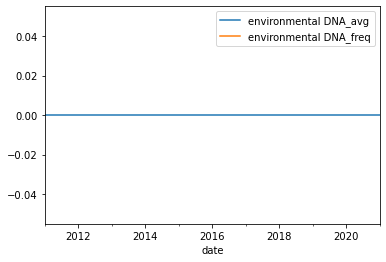

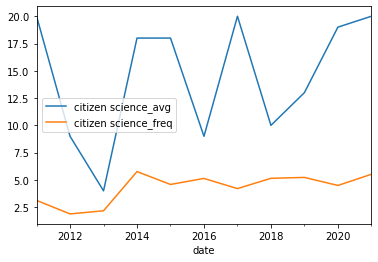

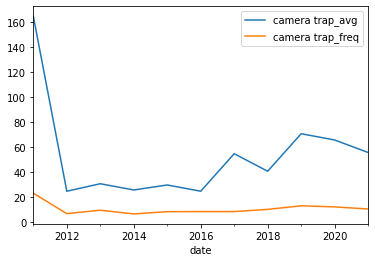

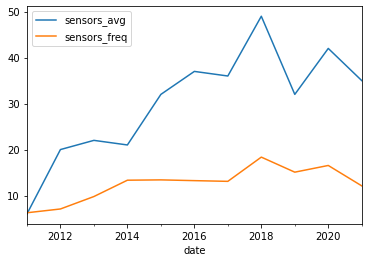

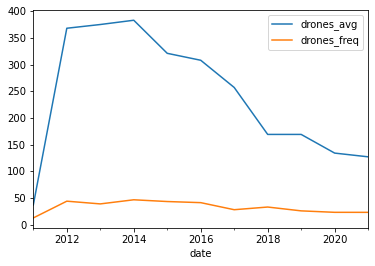

In [15]:
# Analyze
## How has the conversation about AI/ML changed over time? (Twitter frequency/average)
from observatory import analyze_twitter
avg, freq, total = analyze_twitter(words, terms = ["environmental DNA", "citizen science", "camera trap", "sensors", "drones"])
## Where the term conservation is used
#, freq, total = analyze_twitter(words.loc[words['nature']>0], ["artificial intelligence", "machine learning"])

In [19]:
## Are certain organizations (and organization sizes) more likely to mention AI/ML? (Crawl)
from observatory import analyze_orgs
avg, freq = analyze_orgs(words, orgs = ["raresites", "davidsuzuki", "grandriver", "wwf", "ecotrust", "natureconservancy"], terms = ["drones", "sensors", "citizen science", "environmental DNA", "camera trap"])
## Are certain organizations more likely to mention ethics terms in conjunction with AI/ML? (Crawl)
#avg, freq = analyze_orgs(words.loc[(words["sensors"]>0) | (words["drones"]>0) | (words["citizen science"]>0) | (words["camera trap"]>0)], orgs = ["raresites", "davidsuzuki", "grandriver", "wwf", "ecotrust", "natureconservancy"], terms = ["privacy", "surveillance"])
avg

,drones_avg,sensors_avg,citizen science_avg,environmental DNA_avg,camera trap_avg
raresites,0.0,0.75,10.57,0.0,0.0
davidsuzuki,0.25,0.05,1.58,0.0,0.0
grandriver,0.0,0.0,0.27,0.0,0.0
wwf,0.36,0.08,0.47,0.0,0.61
ecotrust,0.0,0.82,0.0,0.0,0.0
natureconservancy,0.17,0.09,2.91,0.0,0.57


sensors camera trap
Zeros: 28387, 93%
camera trap but not sensors: 698, 2%
sensors but not camera trap: 991, 3%
Together: 266, 0%




,sensors,camera trap
sensors,1.000000,0.258025
camera trap,0.258025,1.000000


<AxesSubplot:xlabel='sensors', ylabel='camera trap'>

camera trap sensors
Zeros: 28387, 93%
sensors but not camera trap: 991, 3%
camera trap but not sensors: 698, 2%
Together: 266, 0%




,camera trap,sensors
camera trap,1.000000,0.258025
sensors,0.258025,1.000000


<AxesSubplot:xlabel='camera trap', ylabel='sensors'>

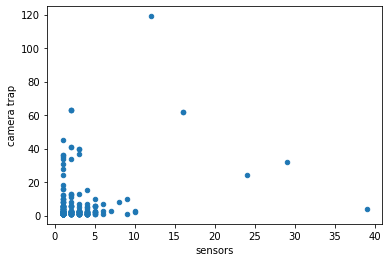

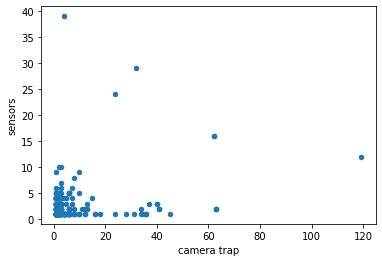

In [25]:
## Are certain topics associated with other (e.g. forest and AI vs mountain and AI?) (Twitter, Google, and Crawl)
from observatory import analyze_term_correlations
#analyze_term_correlations(words, ["artificial intelligence", "river", " ai "])
analyze_term_correlations(words, ["sensors", "camera trap"])